<a href="https://colab.research.google.com/github/KeoratileShongoane/AML/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# **Applications of Machine Learning in Chemistry**: Assignment 2
#### __Name:__ Keoratile Shongoane
#### __Student number:__ 1389986

***


#Table of Contents

- [Imports](#imports)
- [1. Data Exploration](#1-data-exploration)
  - [1.1 Importing Data](#11-importing-data)
  - [1.2 Viewing the Dataset](#12-viewing-the-dataset)
  - [1.3 Dataset Information](#13-dataset-information)
  - [1.4 Histogram and Boxplot](#14-histogram-and-boxplot)
  - [1.5 Removing Outliers](#15-removing-outliers)
- [2. Molecular Descriptors Calculation](#2-molecular-descriptors-calculation)
- [3. Data Preprocessing](#3-data-preprocessing)
  - [3.1 Train-Test Split](#31-train-test-split)
- [4. Model Training and Evaluation](#4-model-training-and-evaluation)
  - [4.1 Random Forest Regression](#41-random-forest-regression)
  - [4.2 Visualizations](#42-visualizations)
- [5. Results Discussion and Conclusion](#5-results-discussion-and-conclusion)



The goal of this report is to apply machine learning techniques to predict the solubility (logS) of chemical compounds based on their chemical properties. This report examines various features and their interactions within machine learning models.


In [2]:
# In a Jupyter cell
%pip install rdkit-pypi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 55.9 MB/s eta 0:00:00


# __Imports__

In [22]:
# Import the libraries
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors

# __1. Data Exploration__



### __1.1 Importing Data__

In [4]:
# loading the dataset to a Pandas Dataframe
df = pd.read_csv('/content/solubility.csv')

### __1.2 Viewing the dataset__

Veiwing the dataset allows us to spot any anormalies and allows one to understand the data that they are working with. This allows for the use of appropriate anaylsis techniques.

In [5]:
# Viewing the first and last 5 rows of the dataset
df.head()
df.tail()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


###__1.3 Dataset information__

In [7]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


The dataset information shows that the dataset has no null values and the features have mixed data types.

In [8]:
# calculating descriptive statistics
df.describe()

,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


### __1.4 Histogram and Boxplot__

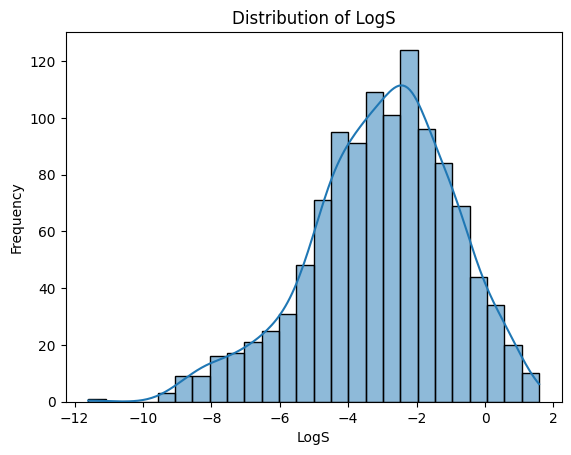

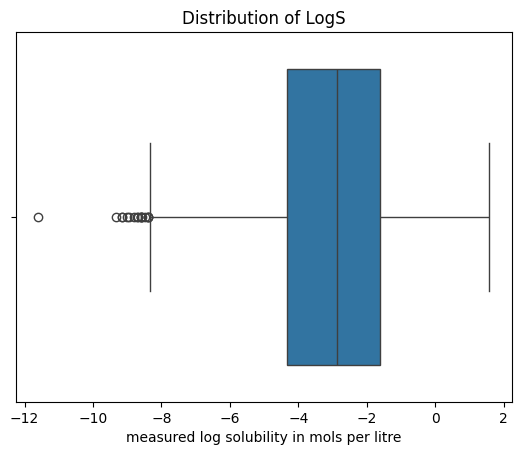

In [31]:
# Visualize the distribution of the target variable (logS)
sns.histplot(df['measured log solubility in mols per litre'], kde=True)
plt.title('Distribution of LogS')
plt.xlabel('LogS')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='measured log solubility in mols per litre', data=df)
plt.title('Distribution of LogS')
plt.show()

Outliers were identified in the dtatset using histograms and boxplots, which showed values that deviated from the majority of the data. The Interquartile Range (IQR) method was used
 to define bounds for outliers:

- **Lower Bound:** Calculated as Q1 - 1.5 * IQR.
- **Upper Bound:** Calculated as Q3 + 1.5 * IQR.

Removing outliers is important because they can skew the result of the machine learning models, causing to inaccurate predictions and reducing the models performance. By removing the outliers, it will altemately improve the reliability of the model's predictions.

### __1.5 Removing Outliers__

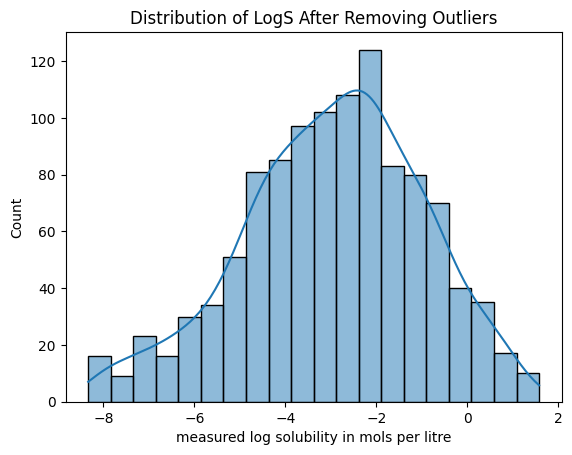

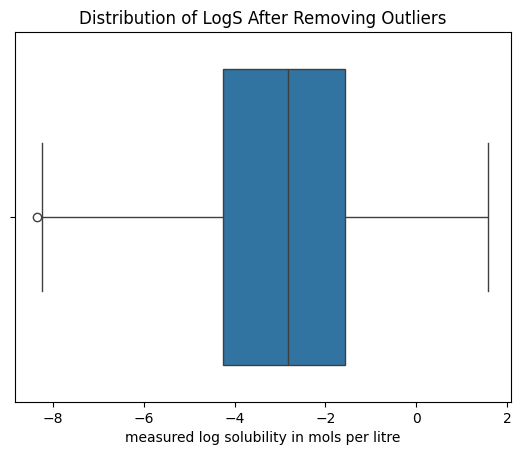

In [16]:
# Calculate the IQR for the 'measured log solubility in mols per litre' column
Q1 = df['measured log solubility in mols per litre'].quantile(0.25)
Q3 = df['measured log solubility in mols per litre'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[
    (df['measured log solubility in mols per litre'] >= lower_bound) &
    (df['measured log solubility in mols per litre'] <= upper_bound)
]

# Visualize the distribution after removing outliers
sns.histplot(df_no_outliers['measured log solubility in mols per litre'], kde=True)
plt.title('Distribution of LogS After Removing Outliers')
plt.show()

sns.boxplot(x='measured log solubility in mols per litre', data=df_no_outliers)
plt.title('Distribution of LogS After Removing Outliers')
plt.show()


# __2. Molecular Descriptors Calculation__


The "fromsmiles" function accepts a SMILES string or list of SMILES strings as an argument, and returns a Python dictionary with descriptor/fingerprint names/values as keys/values respectively - if multiple SMILES strings are supplied, "from_smiles" returns a list of dictionaries.

In [21]:
# Function to generate descriptors as a pandas Series
def generate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        descriptors = {
            'MolWt': Descriptors.MolWt(mol),         # Molecular Weight
            'MolLogP': Descriptors.MolLogP(mol),     # LogP (octanol-water partition coefficient)
            'NumHDonors': Descriptors.NumHDonors(mol), # Number of Hydrogen Bond Donors
            'NumHAcceptors': Descriptors.NumHAcceptors(mol), # Number of Hydrogen Bond Acceptors
            'TPSA': Descriptors.TPSA(mol)            # Topological Polar Surface Area
        }
        return pd.Series(descriptors)
    else:
        return pd.Series({'MolWt': None, 'MolLogP': None, 'NumHDonors': None, 'NumHAcceptors': None, 'TPSA': None})

# Apply the generate_descriptors function to the SMILES column of df_no_outliers
descriptor_df_no_outliers = df_no_outliers['smiles'].apply(generate_descriptors)

# Concatenate the original DataFrame with the new descriptors DataFrame
data = pd.concat([df_no_outliers, descriptor_df_no_outliers], axis=1).dropna()

# Display the first few rows of the resulting DataFrame
print(data.head())



  Compound ID  Minimum Degree  Molecular Weight  Number of H-Bond Donors  \
0   Amigdalin               1           457.432                        7   
1    Fenfuram               1           201.225                        1   
2      citral               1           152.237                        0   
3      Picene               2           278.354                        0   
4   Thiophene               2            84.143                        0   

   Number of Rings  Number of Rotatable Bonds  Polar Surface Area  \
0                3                          7              202.32   
1                2                          2               42.24   
2                0                          4               17.07   
3                5                          0                0.00   
4                1                          0                0.00   

   measured log solubility in mols per litre  \
0                                      -0.77   
1                               

# __3. Data Preprocessing__

### __3.1 Train-Test Split__

In [23]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target variable (y)
X = data[['Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings',
          'Number of Rotatable Bonds', 'Polar Surface Area',
          'MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'TPSA']]
y = data['measured log solubility in mols per litre']  # Target column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the resulting splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (888, 10), (888,)
Testing set shape: (223, 10), (223,)


# __4. Model Training and Evaluation__

#### Here, I trained 1 model, namely: `Random Forest Regression`.

The Random Forest Regression model was chosen for its ability to capture complex, non-linear relationships between molecular descriptors and solubility, making it highly effective for predicting chemical properties without extensive preprocessing.




### __4.1 Random Forest Regression__


In [25]:
# initialize and train the random tree regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [28]:
# prediction
y_pred_rf = rf_model.predict(X_test)

`Model Evaluation`

In this report the following evaluation metrics are used:



*   `Mean Squared Error`
*   `Root Mean Square Error`
*   `R-squared`

In [29]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression - MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}')


Random Forest Regression - MSE: 0.392174431217322, RMSE: 0.6262383182282301, R^2: 0.8923017893339006


### __4.2 Visualizations__

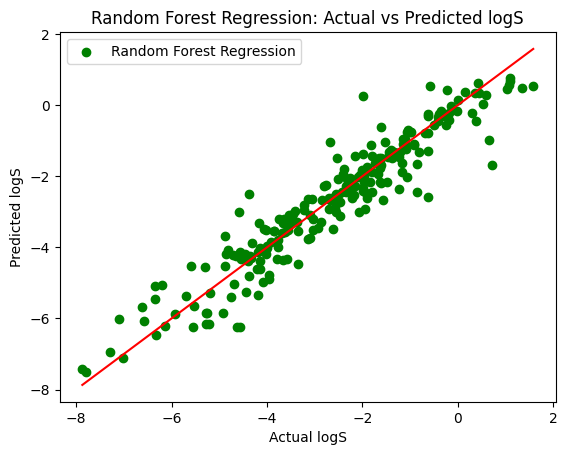

In [30]:
# Scatter plot of actual vs predicted logS
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual logS')
plt.ylabel('Predicted logS')
plt.title('Random Forest Regression: Actual vs Predicted logS')
plt.legend()
plt.show()



# Results discussion and Conclusion

### Results Discussion and Conclusion

The Random Forest Regression model shows strong performance in predicting solubility, with a low Mean Squared Error (MSE) of 0.392, a Root Mean Squared Error (RMSE) of 0.626, and an R² value of 0.892, indicating that the model explains about 89% of the variability in solubility values.

**Discussion:**
- The model is effective in predicting solubility, as reflected by the high R² value and low error metrics.
- Before training the model, outliers in the solubility data were identified and removed. Removing these outliers helped improve the model's accuracy by ensuring that extreme values did not skew the predictions.
- The scatter plot comparing predicted and actual solubility values confirms that the model’s predictions are close to the actual values, suggesting that the removal of outliers contributed to this accuracy.

**Key chemical features**

 Molecular Weight, MolLogP, and Polar Surface Area, have a significant impact on the model’s predictions. These features are directly related to how a molecule interacts with its environment, which in turn affects its solubility. The model's ability to accurately reflect these relationships further shows its effectiveness.

 The model performs well overall, there may still be limitations due to the complexity of solubility as a property and the potential for interactions between features that are not fully captured by the model.

**Limitations:**
- Although the model performs well, it might be overly fitted to the cleaned dataset, which could affect its generalizability to new data.
- The process of removing outliers is important for model accuracy, but might have also removed valid data points, potentially limiting the model's ability to capture the full range of solubility behaviors.

**Conclusion**

The Random Forest model effectively predicts solubility, with the removal of outliers playing a crucial role in enhancing accuracy. However, the potential for overfitting and the careful balance of outlier removal should be considered when applying the model to new datasets.